In [1]:
# ㅅㅐㄱㅇㅡㄹ ㅈㅗㅁ ㄷㅓ ㄷㅏㅇㅑㅇㅎㅏㄱ ㅁㅏㄴㄷㅡㄹㄱㅣ

In [11]:
import face_recognition
import argparse
import numpy as np
import os.path
import cv2 
import random

from matplotlib import pyplot as plt
%matplotlib inline

def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")
    plt.show()

In [12]:
old_path = 'data/k-face/new_path/train_align_112'
new_path = 'data/k-face/k-face_align_112'

In [13]:
# gamma LUT table
def gamma_lut(gamma):
    invGamma = 1.0 / gamma
    return np.array([((i/255.0)**invGamma) * 255 for i in np.arange(0, 256)]).astype('uint8')

In [14]:
def gamma_LUT(img, num): 
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    H, S, V = cv2.split(img_hsv)
    gamma_S = cv2.LUT(S, gamma_lut(num))
    gamma_img =cv2.merge([H, gamma_S, V])
    gamma_img = cv2.cvtColor(gamma_img, cv2.COLOR_HSV2BGR)
    return gamma_img

In [59]:
def gamma_LUT(img,alpha, num): 
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    H, S, V = cv2.split(img_hsv)
    if num == 1:
        H += 10
        H = cv2.LUT(H, gamma_lut(alpha))
    
    else:
        S = cv2.LUT(S, gamma_lut(alpha))
        
    lut_img =cv2.merge([H, S, V])
    lut_img = cv2.cvtColor(lut_img, cv2.COLOR_HSV2BGR)
    return lut_img

[Errno 2] No such file or directory: 'data/k-face/k-face_align_112/train_align_112'
[Errno 2] No such file or directory: 'data/k-face/k-face_align_112/19092732'
0.6679977336068054 [1]


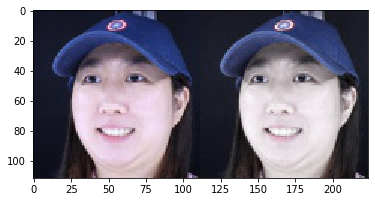

1.0834033366872502 [2]


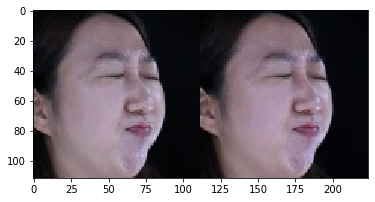

1.610628009333017 [2]


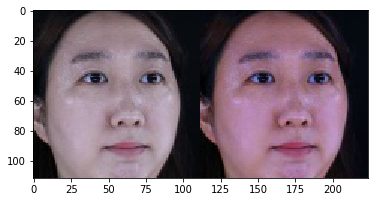

0.7559416798648816 [2]


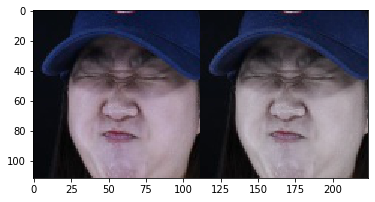

1.8936015523618075 [2]


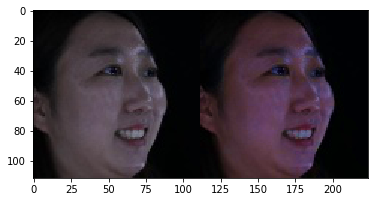

1.8434432573237718 [2]


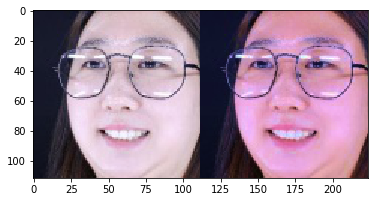

1.0003615571925206 [2]


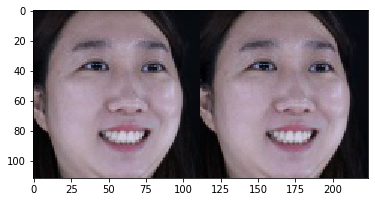

1.4003536001270878 [2]


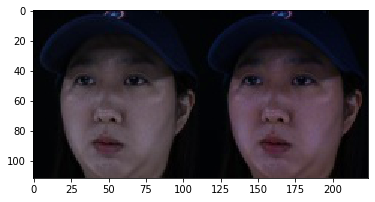

1.1759329488231276 [2]


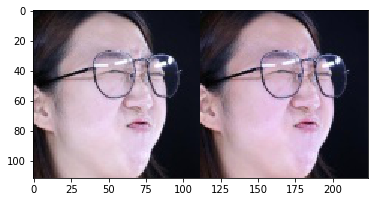

1.5925224260968243 [2]


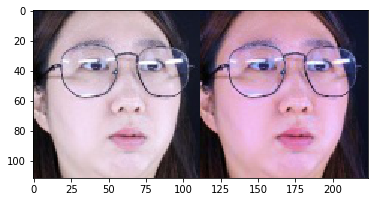

1.305765347540514 [1]


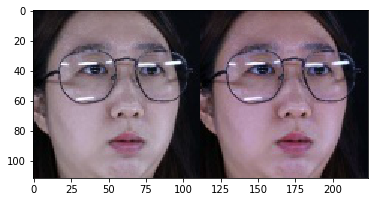

0.6441889376273758 [2]


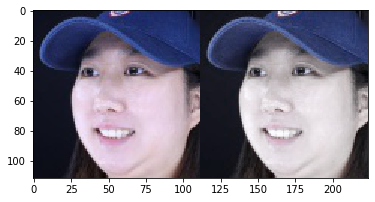

0.7721815742503424 [2]


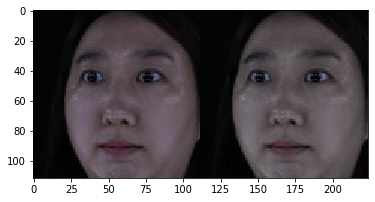

1.3610685382201972 [1]


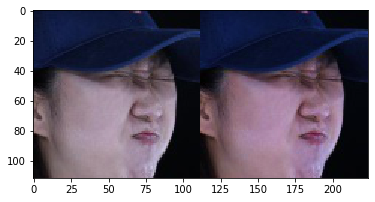

1.605239067652842 [1]


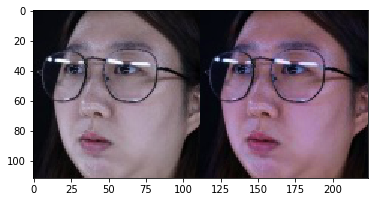

1.1587696638277776 [1]


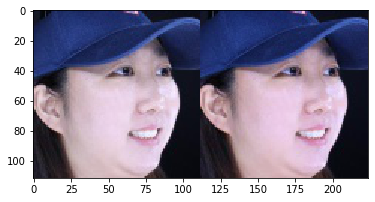

1.7829776301366038 [1]


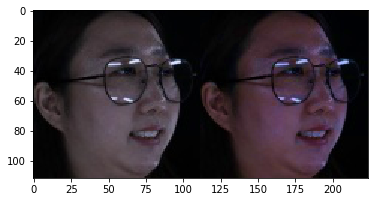

0.8840544248697946 [1]


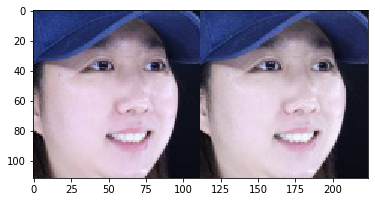

1.7841111646528953 [1]


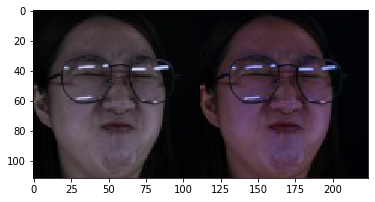

0.7997929877865273 [2]


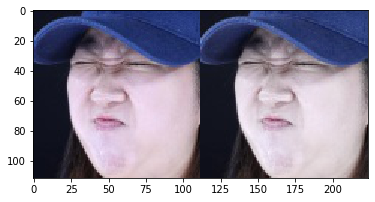

0.7409557322899976 [1]


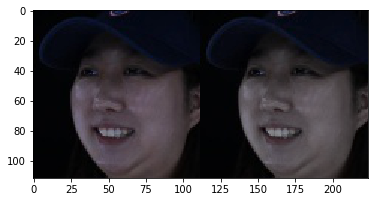

1.3581894944894484 [2]


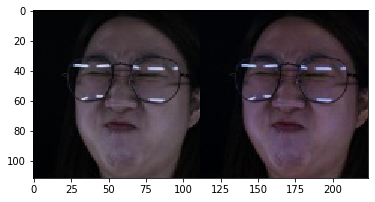

0.694980857409605 [1]


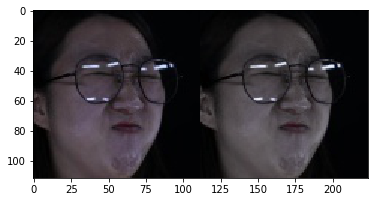

1.9026770251305647 [1]


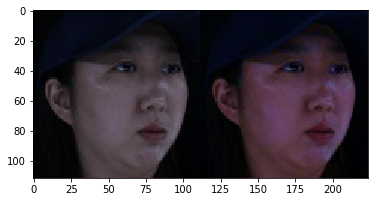

0.8333212325599193 [2]


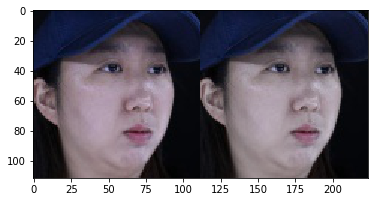

1.3838584987511526 [2]


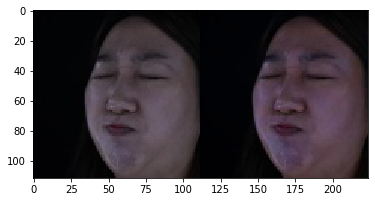

0.8460590128580299 [1]


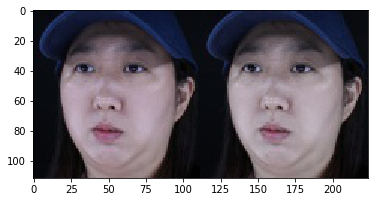

1.9989786058266605 [2]


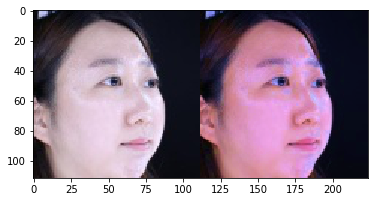

1.3577490859758528 [2]


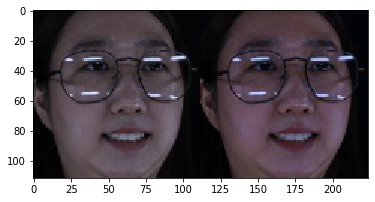

0.973372074380614 [2]


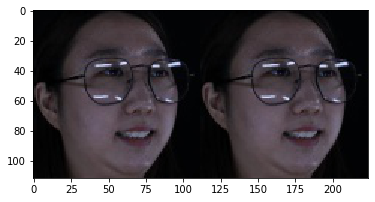

1.783545408989664 [2]


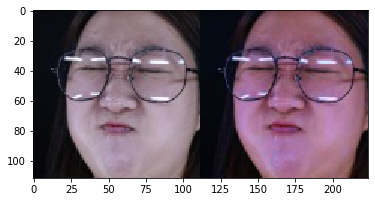

1.6018555336618483 [2]


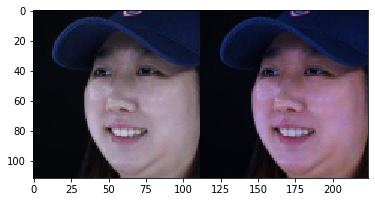

0.7635831771657593 [1]


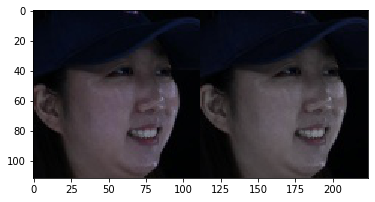

0.8441465214606505 [1]


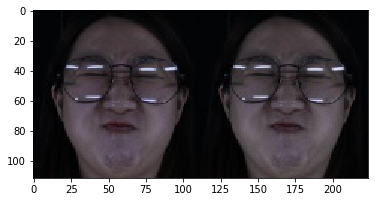

1.5952158533242962 [2]


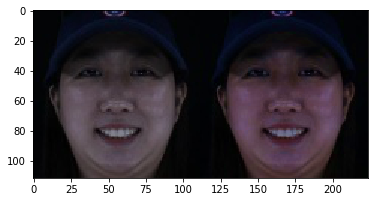

0.8630440389336081 [2]


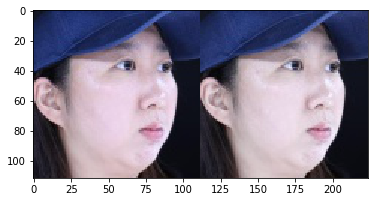

1.2780598078877397 [2]


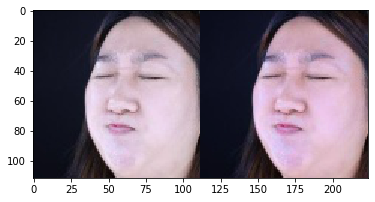

1.5249281524405742 [1]


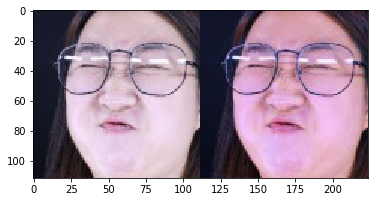

1.0513349606146338 [2]


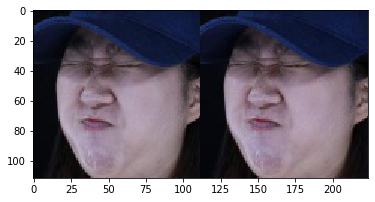

0.5406114120460432 [2]


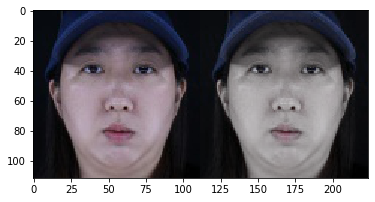

1.569905871559304 [1]


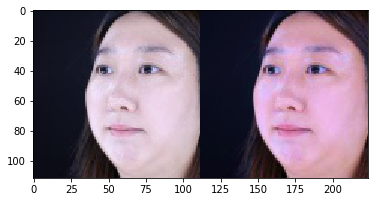

1.9959668437624107 [1]


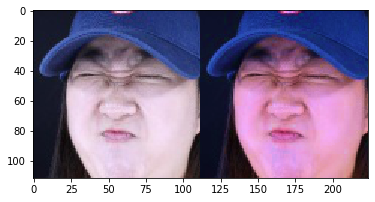

0.7383105481466942 [2]


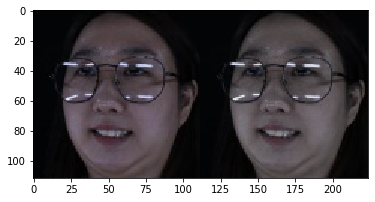

1.5480813093358807 [2]


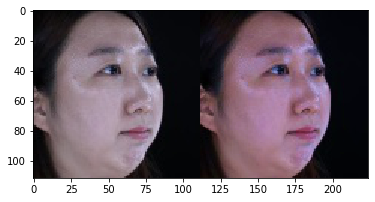

1.7201258014414331 [2]


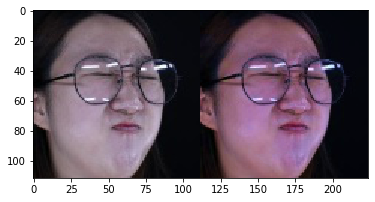

0.6358207762453303 [1]


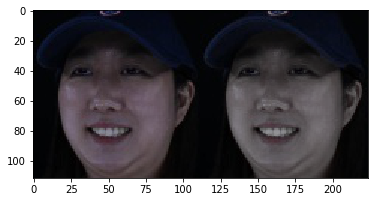

1.1223007904366082 [2]


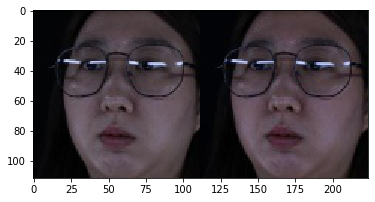

1.5662826281141349 [1]


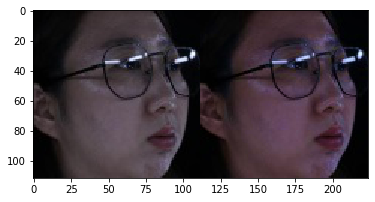

1.865501194925335 [1]


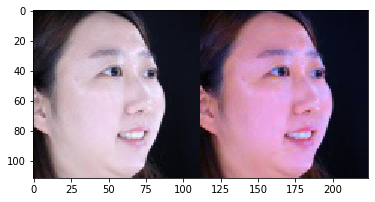

1.8790800668969756 [1]


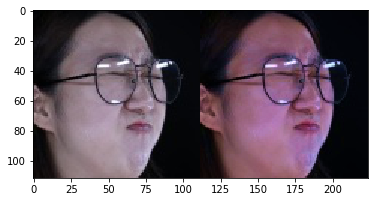

1.7465804541846128 [1]


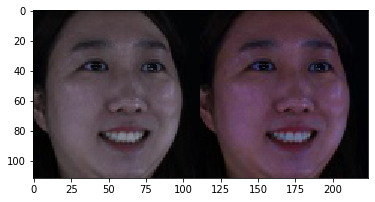

0.8067297685344641 [2]


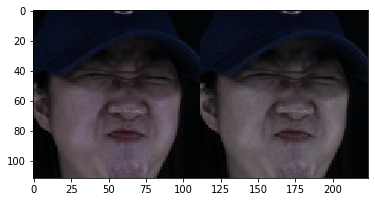

0.9720850304015853 [1]


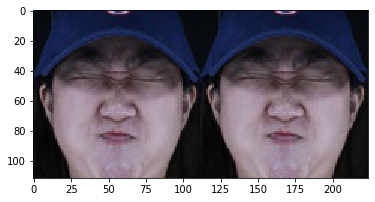

1.4415958981903343 [2]


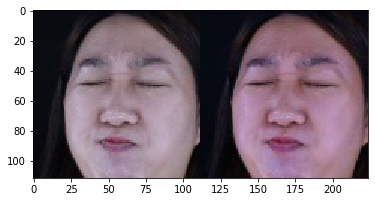

1.0743672590441866 [2]


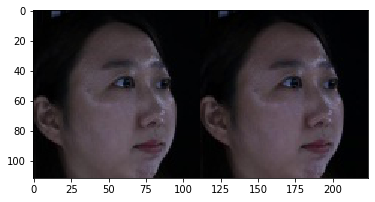

0.9149148270942662 [1]


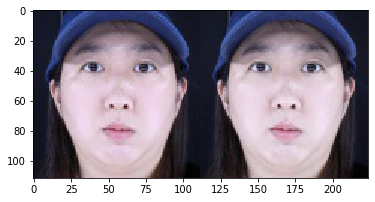

1.414412792684004 [1]


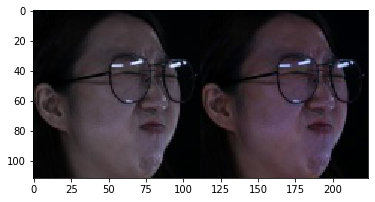

1.1789148339556528 [1]


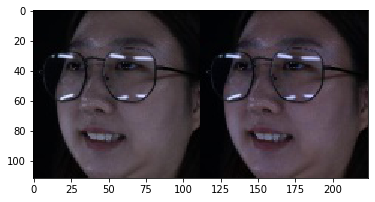

1.0973663759128645 [1]


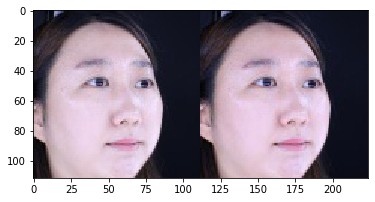

1.4211511502853085 [1]


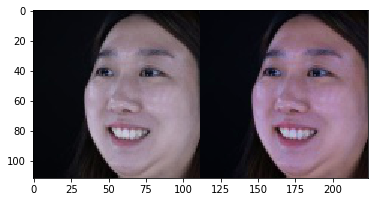

1.2655516219135106 [2]


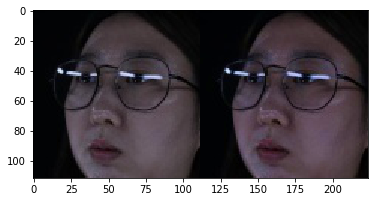

1.1061526029207194 [1]


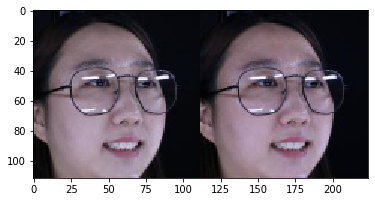

1.2100483716638626 [1]


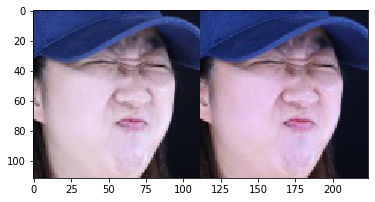

0.5648686750060268 [1]


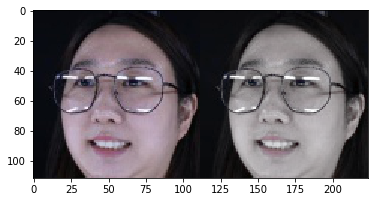

0.8289241250092864 [2]


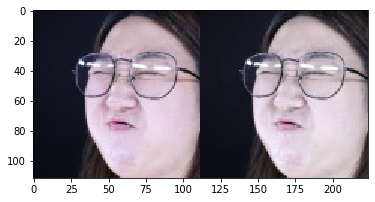

0.9534226020626275 [2]


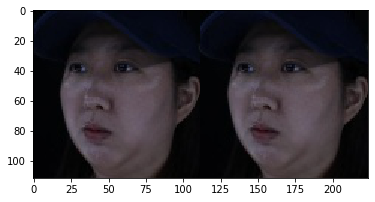

1.6057287608371158 [2]


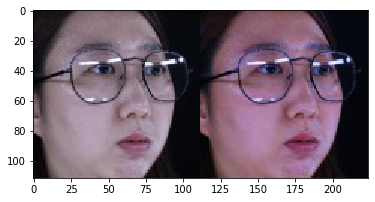

1.6766997719549122 [2]


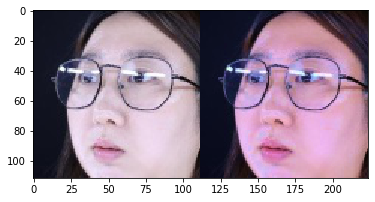

1.084461727575241 [1]


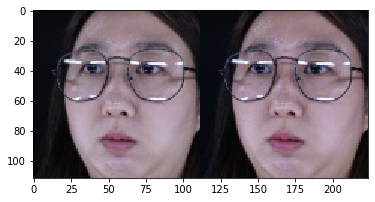

1.1137965585579743 [2]


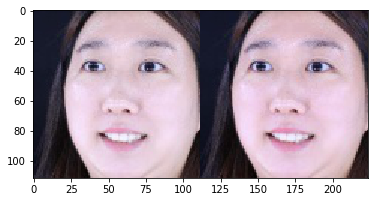

0.9725212881661149 [2]


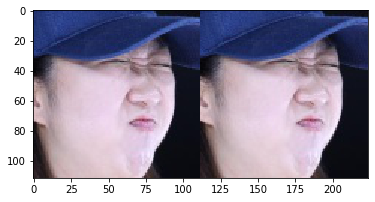

1.8703133910743475 [1]


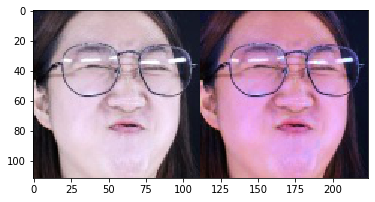

0.9575815238438083 [2]


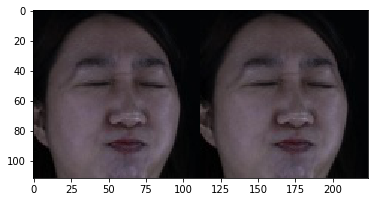

0.9862850381211228 [1]


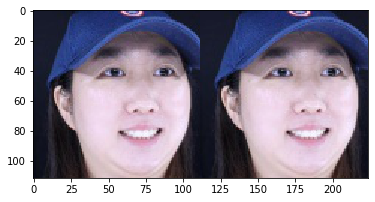

0.6412928375374316 [1]


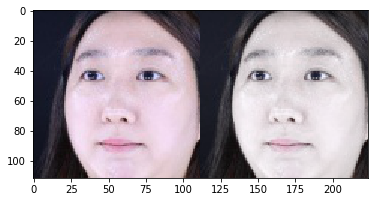

0.6056930244090002 [2]


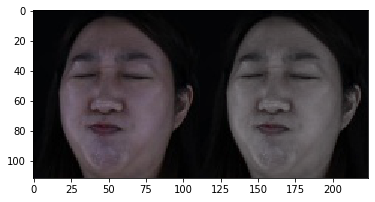

0.7849009405610021 [1]


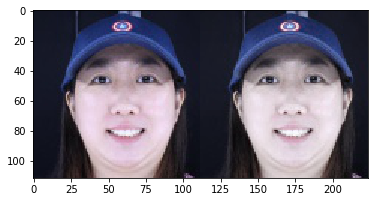

1.3988013619128536 [2]


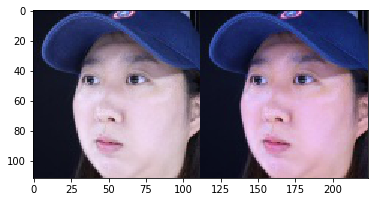

1.8860886038496996 [2]


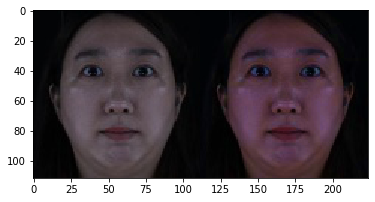

0.8008912798485628 [2]


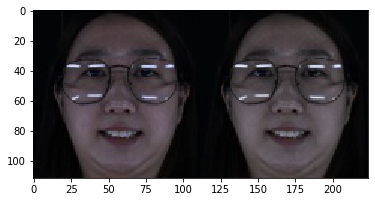

0.7231224919576715 [2]


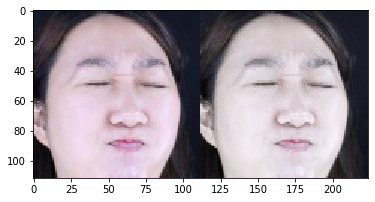

0.5118460466590413 [1]


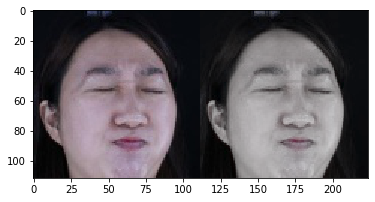

1.2858982318799161 [2]


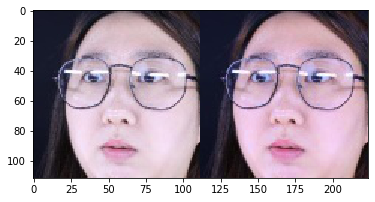

1.6289956048342966 [1]


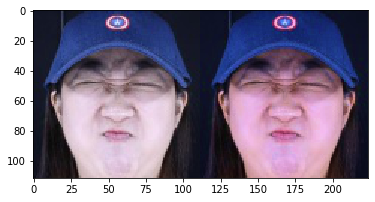

1.1405086835126268 [2]


KeyboardInterrupt: 

In [60]:
for root, dirs, files in os.walk(old_path):
#     print(dirs)
    people_name = os.path.split(root)[1]
    new_people_dir = os.path.join(new_path, people_name)
    try:
        os.mkdir(new_people_dir)
    except Exception as err:
        print(err)
    # face recognition and  save	
    for i, file in enumerate(files):
        img_path = os.path.join(root, file)
        img = cv2.imread(img_path, 1)
        if img is not None:
            
            # range: 0.5~2.0
            alpha = (random.random() * 1.5) +0.5
            # change hue or satuation
            num = random.sample([1,2], 1)
            print(alpha, num)
            gamma_img = gamma_LUT(img,alpha, num)
#             imshow('', np.hstack([img,gamma_img]))
            save_path = f"{new_path}/{people_name}/{i}.jpeg"
            cv2.imwrite(img_path, resize_image)

In [ ]:
import random

In [ ]:
num = random.choice([1,2,3])
num

In [ ]:
random.sample(list(range(0.5,2.5,0.1)), 1)

In [ ]:
(random.random() * 2) +0.5 

In [ ]:
random